C:\Users\usham\anaconda3\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[0.03880722906235728, 0.1932331645469372, 0.054830578374401126, 0.01196201034306581, 0.20224658148422922, 0.1618774829636667, 0.23875435581366594, 0.08664913300348409, 0.10445726971325267, 0.1790644018029906, 0.03654252961736779, -0.010283477499640242, 0.11966832044835911, 0.24067223225901502, 0.0759892562845943, 0.15661699711697513, 0.04103382669442788, 0.18892103796799692, 0.20213081706342464, 0.21391424198258388, 0.23267051956510423, 0.22170577415637094, 0.2288209416912162, 0.22878427432752463, 0.2352530955575997, 0.2620413762009714, 0.25897518868393654, 0.14600227931661938, 0.11227629055472604, 0.20793388305124696, 0.27050537650835516, 0.25967456605785805, 0.17829152291083084, 0.1310559510258276, 0.16541047527689318, 0.2072227606113774, 0.2585425942585074, 0.2267363941275875, 0.2623693162626111, 0.1828651694741142, 0.1776258187807038, 0.12863198148901503, 0.15632150717367246, -0.028211033365832333, 0.05814255285293505, 0.0032395503378168868, 0.20521366288906942, 0.104661180621923, 

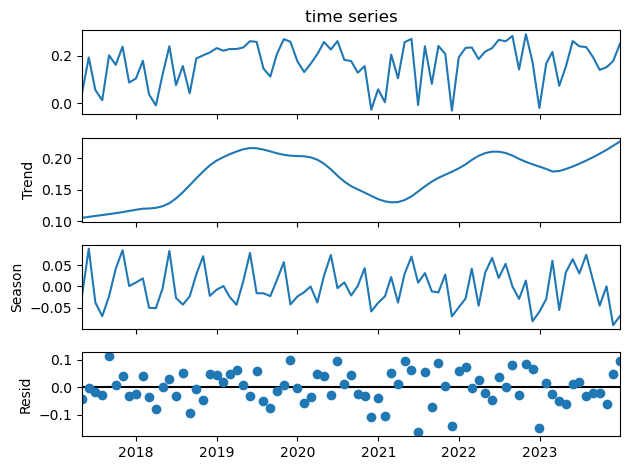

In [1]:
#STL-AR MODEL
import os
import rasterio
import numpy as np
from PIL import Image
import pandas as pd
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import seaborn as sns
from pandas.plotting import register_matplotlib_converters

def calculate_evi(red, blue, nir, scale_factor=2.5, canopy_background_adjustment=1.0):
    # Convert input bands to float to avoid integer division
    red = red.astype(float)
    blue = blue.astype(float)
    nir = nir.astype(float)
    evi = scale_factor * ((nir - red) / (nir + 2.4 * red  + 1))
    return evi
# List to store EVI values
def read_images(folder_path):
    evi_values = []
    filee=os.listdir(folder_path)
    filee.sort()
    for filename in filee:
        if filename.endswith(".jpeg"):  # Assuming images are in jpg format
            img_path = os.path.join(folder_path, filename)
            with rasterio.open(img_path) as src:
                red=src.read(3)
                redd=np.mean(red)
                blue = src.read(1)
                bluee=np.mean(blue)
                nir = src.read(2)
                nirr=np.mean(nir)
            
            evi = calculate_evi(redd, bluee, nirr)
            evi_values.append(evi)
    return evi_values           
# Load images from folder into a time series
image_folder = r"C:\dataset"
time_series_data = read_images(image_folder)
print(time_series_data)
ts = pd.Series(
    time_series_data, index=pd.date_range("4-1-2017", periods=len(time_series_data), freq="M"), name="time series"
)
ts.describe()
from statsmodels.tsa.seasonal import STL

stl = STL(ts, seasonal=13)
res = stl.fit()
fig = res.plot()
res = stl.fit()
trend, seasonal, resid = res.trend, res.seasonal, res.resid
data = pd.Series(trend)
# Split the data into train and test sets
train_size = int(len(data) * 0.86)
train, test = data[:train_size], data[train_size:]
# Fit the AutoRegressive model
lags = 10  # Number of lag terms in the AR model
ar_model = AutoReg(train, lags=lags)
ar_model_fit = ar_model.fit()
# Make predictions
predictions = ar_model_fit.predict(start=len(train), end=len(train) + len(test) - 1)

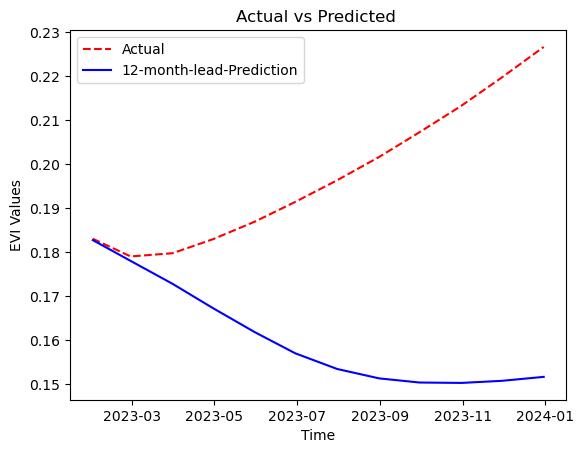

Mean Absolute Error: 0.03670240539380677
Percentage Accuracy: 81.39552808166832 %
PCC : 0.8124686065292677
RMSE : 0.04477261805683092


In [2]:
predictions = ar_model_fit.predict(start=len(train), end=len(train) + len(test) - 1)
plt.plot(test, label='Actual',linestyle='--',color='red')
plt.plot(predictions, label='12-month-lead-Prediction',color='blue')
plt.legend()
plt.xlabel('Time')
plt.ylabel('EVI Values')
plt.title('Actual vs Predicted ')
plt.show()
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test, predictions)
print("Mean Absolute Error:", mae)
percentage_accuracy = 100 - (mae / np.mean(test)) * 100
print("Percentage Accuracy:", percentage_accuracy, "%")
print("PCC :",np.abs(np.corrcoef(test, predictions)[0, 1]))
print("RMSE :",np.sqrt(mean_squared_error(test, predictions)))

C:\Users\usham\anaconda3\Lib\site-packages\rasterio\__init__.py:317: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


[0.03880722906235728, 0.1932331645469372, 0.054830578374401126, 0.01196201034306581, 0.20224658148422922, 0.1618774829636667, 0.08664913300348409, 0.10445726971325267, 0.1790644018029906, 0.03654252961736779, -0.010283477499640242, 0.11966832044835911, 0.0759892562845943, 0.15661699711697513, 0.04103382669442788, 0.18892103796799692, 0.20213081706342464, 0.21391424198258388, 0.23267051956510423, 0.22170577415637094, 0.2288209416912162, 0.22878427432752463, 0.2352530955575997, 0.2620413762009714, 0.25897518868393654, 0.14600227931661938, 0.11227629055472604, 0.20793388305124696, 0.27050537650835516, 0.25967456605785805, 0.17829152291083084, 0.1310559510258276, 0.16541047527689318, 0.2072227606113774, 0.2585425942585074, 0.2267363941275875, 0.2623693162626111, 0.1828651694741142, 0.1776258187807038, 0.12863198148901503, 0.15632150717367246, -0.028211033365832333, 0.05814255285293505, 0.0032395503378168868, 0.20521366288906942, 0.104661180621923, 0.25767742409035577, 0.27166323827994676, 

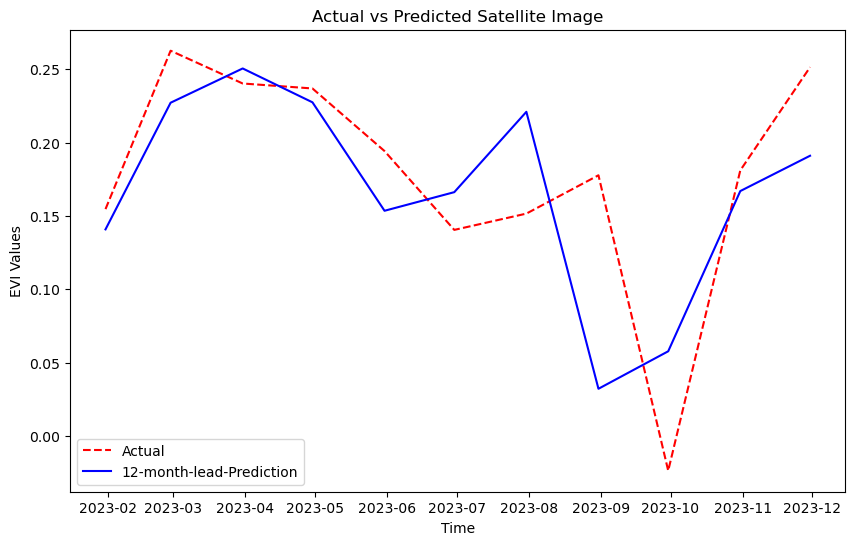

Mean Absolute Error: 0.04603572598026837
Percentage Accuracy: 74.25748693983132 %
PCC : 0.6596829713885668
RMSE : 0.06064966007263505


In [3]:
# SARIMA MODEL
import os
import rasterio
import numpy as np
from PIL import Image
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.statespace.sarimax import SARIMAX
def calculate_evi(red, blue, nir, scale_factor=2.5, canopy_background_adjustment=1.0):
    red = red.astype(float)
    blue = blue.astype(float)
    nir = nir.astype(float)
    # Calculate EVI
    evi = scale_factor * ((nir - red) / (nir + 2.4 * red  + 1))
    return evi
# List to store EVI values
def read_images(folder_path):
    evi_values = []
    filee=os.listdir(folder_path)
    filee.sort()
    for filename in filee:
        if filename.endswith(".jpeg"):  # Assuming images are in jpg format
            img_path = os.path.join(folder_path, filename)
            #img = plt.imread(img_path)
            with rasterio.open(img_path) as src:
                red=src.read(3)
                redd=np.mean(red)
                blue = src.read(1)
                bluee=np.mean(blue)
                nir = src.read(2)
                nirr=np.mean(nir)
            evi = calculate_evi(redd, bluee, nirr)
        # Append EVI values to the list
            evi_values.append(evi)
    return evi_values           
# Load images from folder into a time series
image_folder = r"D:\dataset"
time_series_data = read_images(image_folder)
print(time_series_data)
ts = pd.Series(
    time_series_data, index=pd.date_range("4-1-2017", periods=len(time_series_data), freq="M"), name="time series"
)
ts.describe()
train_size = int(len(ts) * 0.87)
train_data, test_data = ts[:train_size], ts[train_size:]

# SARIMA model parameters
order = (1, 1, 1)  # ARIMA order
seasonal_order = (1, 1, 1,12)  # Seasonal order
trend = 'c'  # 'c' for constant trend
# Fit SARIMA model
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order, trend='t', enforce_stationarity=False)
result = model.fit()
# Forecast
forecast = result.forecast(steps=len(test_data))
# Plot actual vs predicted
plt.figure(figsize=(10,6))
plt.plot(test_data, label='Actual',linestyle='--',color='red')
plt.plot(forecast, label='12-month-lead-Prediction',color='blue')
plt.legend()
plt.title('Actual vs Predicted Satellite Image')
plt.ylabel('EVI Values')
plt.xlabel('Time')
plt.show()
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(test_data, forecast)
print("Mean Absolute Error:", mae)
percentage_accuracy = 100- (mae / np.mean(test_data)) * 100
print("Percentage Accuracy:", percentage_accuracy, "%")
print("PCC :",np.abs(np.corrcoef(test_data, forecast)[0, 1]))
print("RMSE :",np.sqrt(mean_squared_error(test_data, forecast)))

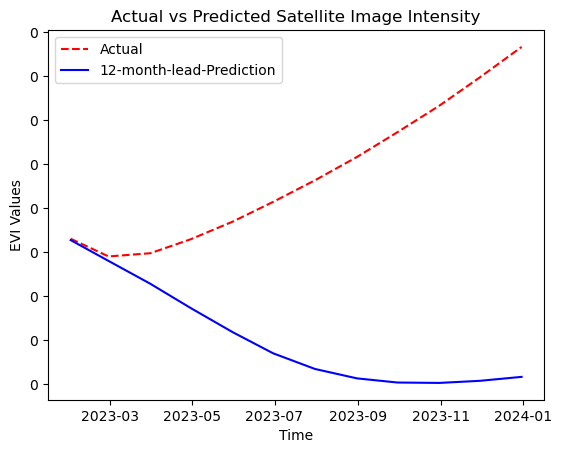

In [4]:
import matplotlib.pyplot as plt

# Assuming you have already defined test and predictions

# Plot the data
plt.plot(test, label='Actual', linestyle='--', color='red')
plt.plot(predictions, label='12-month-lead-Prediction', color='blue')
plt.legend()
plt.xlabel('Time')
plt.ylabel('EVI Values')
plt.title('Actual vs Predicted Satellite Image Intensity')

# Adjust the y-axis tick labels
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x * 0.1)))

plt.show()


In [ ]:
s